## Что такое ЭКГ

ЭКГ - запись электрической активности сердца, снятая с помощью расположенных на теле человека электродов

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/ecg.png)

### PQRST комплекс

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/pqrst.svg)
[ https://www.wikilectures.eu/w/Electrocardiogram ]

## Нейронные сети

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/fc_layer.png)

[ https://www.researchgate.net/figure/Types-of-pooling-d-Fully-Connected-Layer-At-the-end-of-a-convolutional-neural-network_fig3_337105858 ]

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/neural_net2.jpeg)
[https://cs231n.github.io/convolutional-networks/]

[ Среда для игры с нейронными сетями ]
https://playground.tensorflow.org/

In [1]:
COLAB = False
#COLAB = True

In [2]:
# COLAB
#!wget 

## База Arrhythmia

In [3]:
import numpy as np
import pandas as pd

In [4]:
if COLAB:
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
else:
    url = "arrhythmia.data"
df = pd.read_csv(url, header=None, na_values="?")

In [5]:
df.columns = ['Age', 'Sex', 'Height', 'Weight', 'QRS', 'PR', 'QT', 'T', 'P', 'Angle_QRS', 'Angle_T', 'Angle_P', 'Angle_QRST', 'Angle_J', 'HeartRate',
    'I_Q', 'I_R', 'I_S', 'I_Rs', 'I_Ss', 'I_IntrDefl', 'I_RaggedR', 'I_DiphasR', 'I_RaggedP', 'I_DiphasP', 'I_RaggedT', 'I_DiphasT', 
    'II_Q', 'II_R', 'II_S', 'II_Rs', 'II_Ss', 'II_IntrDefl', 'II_RaggedR', 'II_DiphasR', 'II_RaggedP', 'II_DiphasP', 'II_RaggedT', 'II_DiphasT', 
    'III_Q', 'III_R', 'III_S', 'III_Rs', 'III_Ss', 'III_IntrDefl', 'III_RaggedR', 'III_DiphasR', 'III_RaggedP', 'III_DiphasP', 'III_RaggedT', 'III_DiphasT', 
    'AVR_Q', 'AVR_R', 'AVR_S', 'AVR_Rs', 'AVR_Ss', 'AVR_IntrDefl', 'AVR_RaggedR', 'AVR_DiphasR', 'AVR_RaggedP', 'AVR_DiphasP', 'AVR_RaggedT', 'AVR_DiphasT', 
    'AVL_Q', 'AVL_R', 'AVL_S', 'AVL_Rs', 'AVL_Ss', 'AVL_IntrDefl', 'AVL_RaggedR', 'AVL_DiphasR', 'AVL_RaggedP', 'AVL_DiphasP', 'AVL_RaggedT', 'AVL_DiphasT', 
    'AVF_Q', 'AVF_R', 'AVF_S', 'AVF_Rs', 'AVF_Ss', 'AVF_IntrDefl', 'AVF_RaggedR', 'AVF_DiphasR', 'AVF_RaggedP', 'AVF_DiphasP', 'AVF_RaggedT', 'AVF_DiphasT', 
    'V1_Q', 'V1_R', 'V1_S', 'V1_Rs', 'V1_Ss', 'V1_IntrDefl', 'V1_RaggedR', 'V1_DiphasR', 'V1_RaggedP', 'V1_DiphasP', 'V1_RaggedT', 'V1_DiphasT', 
    'V2_Q', 'V2_R', 'V2_S', 'V2_Rs', 'V2_Ss', 'V2_IntrDefl', 'V2_RaggedR', 'V2_DiphasR', 'V2_RaggedP', 'V2_DiphasP', 'V2_RaggedT', 'V2_DiphasT', 
    'V3_Q', 'V3_R', 'V3_S', 'V3_Rs', 'V3_Ss', 'V3_IntrDefl', 'V3_RaggedR', 'V3_DiphasR', 'V3_RaggedP', 'V3_DiphasP', 'V3_RaggedT', 'V3_DiphasT', 
    'V4_Q', 'V4_R', 'V4_S', 'V4_Rs', 'V4_Ss', 'V4_IntrDefl', 'V4_RaggedR', 'V4_DiphasR', 'V4_RaggedP', 'V4_DiphasP', 'V4_RaggedT', 'V4_DiphasT', 
    'V5_Q', 'V5_R', 'V5_S', 'V5_Rs', 'V5_Ss', 'V5_IntrDefl', 'V5_RaggedR', 'V5_DiphasR', 'V5_RaggedP', 'V5_DiphasP', 'V5_RaggedT', 'V5_DiphasT', 
    'V6_Q', 'V6_R', 'V6_S', 'V6_Rs', 'V6_Ss', 'V6_IntrDefl', 'V6_RaggedR', 'V6_DiphasR', 'V6_RaggedP', 'V6_DiphasP', 'V6_RaggedT', 'V6_DiphasT', 
    'I_Ampl_JJ',   'I_Ampl_Q',   'I_Ampl_R',   'I_Ampl_S',   'I_Ampl_Rs',   'I_Ampl_Ss',   'I_Ampl_P',   'I_Ampl_T',  'I_QRSA', 'I_QRSTA',
    'II_Ampl_JJ',  'II_Ampl_Q',  'II_Ampl_R',  'II_Ampl_S',  'II_Ampl_Rs',  'II_Ampl_Ss',  'II_Ampl_P',  'II_Ampl_T', 'II_QRSA', 'II_QRSTA',
    'III_Ampl_JJ', 'III_Ampl_Q', 'III_Ampl_R', 'III_Ampl_S', 'III_Ampl_Rs', 'III_Ampl_Ss', 'III_Ampl_P', 'III_Ampl_T', 'III_QRSA', 'III_QRSTA',  
    'AVR_Ampl_JJ', 'AVR_Ampl_Q', 'AVR_Ampl_R', 'AVR_Ampl_S', 'AVR_Ampl_Rs', 'AVR_Ampl_Ss', 'AVR_Ampl_P', 'AVR_Ampl_T', 'AVR_QRSA', 'AVR_QRSTA',  
    'AVL_Ampl_JJ', 'AVL_Ampl_Q', 'AVL_Ampl_R', 'AVL_Ampl_S', 'AVL_Ampl_Rs', 'AVL_Ampl_Ss', 'AVL_Ampl_P', 'AVL_Ampl_T', 'AVL_QRSA', 'AVL_QRSTA',  
    'AVF_Ampl_JJ', 'AVF_Ampl_Q', 'AVF_Ampl_R', 'AVF_Ampl_S', 'AVF_Ampl_Rs', 'AVF_Ampl_Ss', 'AVF_Ampl_P', 'AVF_Ampl_T', 'AVF_QRSA', 'AVF_QRSTA',  
    'V1_Ampl_JJ',  'V1_Ampl_Q',  'V1_Ampl_R',  'V1_Ampl_S',  'V1_Ampl_Rs',  'V1_Ampl_Ss',  'V1_Ampl_P',  'V1_Ampl_T',  'V1_QRSA',  'V1_QRSTA',
    'V2_Ampl_JJ',  'V2_Ampl_Q',  'V2_Ampl_R',  'V2_Ampl_S',  'V2_Ampl_Rs',  'V2_Ampl_Ss',  'V2_Ampl_P',  'V2_Ampl_T',  'V2_QRSA',  'V2_QRSTA',
    'V3_Ampl_JJ',  'V3_Ampl_Q',  'V3_Ampl_R',  'V3_Ampl_S',  'V3_Ampl_Rs',  'V3_Ampl_Ss',  'V3_Ampl_P',  'V3_Ampl_T',  'V3_QRSA',  'V3_QRSTA',
    'V4_Ampl_JJ',  'V4_Ampl_Q',  'V4_Ampl_R',  'V4_Ampl_S',  'V4_Ampl_Rs',  'V4_Ampl_Ss',  'V4_Ampl_P',  'V4_Ampl_T',  'V4_QRSA',  'V4_QRSTA',
    'V5_Ampl_JJ',  'V5_Ampl_Q',  'V5_Ampl_R',  'V5_Ampl_S',  'V5_Ampl_Rs',  'V5_Ampl_Ss',  'V5_Ampl_P',  'V5_Ampl_T',  'V5_QRSA',  'V5_QRSTA',
    'V6_Ampl_JJ',  'V6_Ampl_Q',  'V6_Ampl_R',  'V6_Ampl_S',  'V6_Ampl_Rs',  'V6_Ampl_Ss',  'V6_Ampl_P',  'V6_Ampl_T',  'V6_QRSA',  'V6_QRSTA',
    'Class']

In [6]:
df.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T,P,Angle_QRS,...,V6_Ampl_Q,V6_Ampl_R,V6_Ampl_S,V6_Ampl_Rs,V6_Ampl_Ss,V6_Ampl_P,V6_Ampl_T,V6_QRSA,V6_QRSTA,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


https://playground.tensorflow.org

In [7]:
# смотрим на данные
df.describe()

,Age,Sex,Height,Weight,QRS,PR,QT,T,P,Angle_QRS,...,V6_Ampl_Q,V6_Ampl_R,V6_Ampl_S,V6_Ampl_Rs,V6_Ampl_Ss,V6_Ampl_P,V6_Ampl_T,V6_QRSA,V6_QRSTA,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


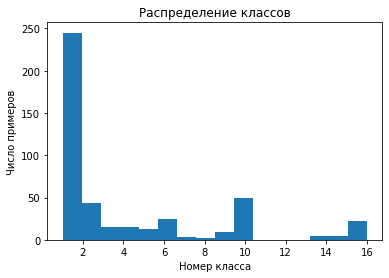

In [8]:
import matplotlib.pyplot as plt

y = df["Class"]
plt.title("Распределение классов")
plt.xlabel("Номер класса")
plt.ylabel("Число примеров")
plt.hist(y, bins=16)
plt.show()

In [9]:
# Дисбаланс классов, делаем задачу попроще
mask = df["Class"] > 1
print(mask)

0       True
1       True
2       True
3      False
4       True
       ...  
447    False
448     True
449     True
450    False
451    False
Name: Class, Length: 452, dtype: bool


In [10]:
df.loc[mask, "Class"] = 0

In [11]:
# Проверяем, что все столбцы числовые
df.shape == df.select_dtypes(['number']).shape

True

In [12]:
# Проверяем наличие столбцов с NaN
is_nan_column = df.isna().any()
nan_columns = df.columns[is_nan_column]
print(nan_columns)

Index(['Angle_T', 'Angle_P', 'Angle_QRST', 'Angle_J', 'HeartRate'], dtype='object')


In [13]:
# Делим выборку на train/test
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [14]:
# Заменяем неизвестные значения на медиану в каждом столбце
median = df_train.median()
df_train = df_train.fillna(median)
df_test = df_test.fillna(median)

In [15]:
# Выделяем X, y из единой таблицы
def get_Xy_from_df(df):
    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy(dtype=np.int)
    return X, y

X_train, y_train = get_Xy_from_df(df_train)
X_test, y_test = get_Xy_from_df(df_test)

In [16]:
# Нормализуем данные
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
n_samples, n_features = X_train.shape
n_classes = 2
print(f"Число обучающих примеров - {n_samples}")
print(f"Число признаков - {n_features}")
print(f"Число классов - {n_classes}")

Число обучающих примеров - 361
Число признаков - 279
Число классов - 2


## Обучение нейронной сети

In [18]:
import torch # библиотека нейронных сетей
import torch.nn as nn # модуль слоёв

In [19]:
model = nn.Sequential(
    nn.Linear(n_features, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
)
print(model)

Sequential(
  (0): Linear(in_features=279, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=1, bias=True)
)


In [20]:
# Функция обучения (одна тренировочная эпоха)
def train_epoch(model, dataloader, loss_function, optimizer):
    losses = []
    for X_batch, y_batch in dataloader:
        logits = model(X_batch)[:, 0]
        loss = loss_function(logits, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data.numpy())
    return np.mean(losses)

In [21]:
from torch.utils.data import TensorDataset, DataLoader

# Функция обучения (несколько тренировочных эпох)
def train(model, X, y, loss_function, optimizer, batch_size=16, epochs=32):
    model.train()
    dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for _ in range(epochs):
        train_epoch(model, dataloader, loss_function, optimizer)

In [22]:
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [23]:
train(model, X_train, y_train, loss_function, optimizer)

In [24]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix, accuracy_score

def print_confusion_matrix(model, X, y):
    model.eval()
    y_pred = model(torch.Tensor(X))[:, 0].data.numpy() > 0
    print(confusion_matrix(y, y_pred))
    accuracy = accuracy_score(y, y_pred)
    print(f"Точность - {accuracy}")
    return accuracy

In [25]:
print_confusion_matrix(model, X_test, y_test)

[[29 18]
 [ 7 37]]
Точность - 0.7252747252747253


0.7252747252747253

In [ ]:
arrhythmia_model = model

In [26]:
model = nn.Sequential(
    nn.Linear(n_features, 25),
    nn.ReLU(),
    nn.Linear(25, 1)
    # КОД: определение слоев
)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [27]:
# train(model, X_train, y_train, loss_function, optimizer)
# assert print_confusion_matrix(model, X_test, y_test) > 0.75,  "Нужно больше точности"

### Переобучение / Недообучение

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/underfitting_overfitting.jpg)
[ https://www.analyticsvidhya.com/blog/2020/02/underfitting-overfitting-best-fitting-machine-learning/ ]

In [28]:
from IPython.display import clear_output

# Обучение с критерием останова
def train_with_stop(model, X_train, y_train, loss_function, optimizer, batch_size=16):
    model.train()
    dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    train_loss_history = []
    test_loss_history = []
    
    while True:
        train_loss = train_epoch(model, dataloader, loss_function, optimizer)
        test_loss = 0 # КОД
        
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        
        clear_output(True)
        plt.title("train/test loss")
        plt.xlabel("Эпоха")
        plt.ylabel("Значение функции потерь")
        plt.plot(train_loss_history)
        plt.plot(test_loss_history)
        plt.legend(["train", "test"])
        plt.show()
        
        # Критерий выхода
        if False:
            break

In [29]:
model = nn.Sequential(
    nn.Linear(n_features, 25),
    nn.ReLU(),
    nn.Linear(25, 1),
)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
# train_with_stop(model, X_train, y_train, loss_function, optimizer)

## Сегментация ЭКГ

### LUDB

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/segmentation.png)

In [30]:
if COLAB:
    !wget https://github.com/MoskalenkoViktor/dl_ecg/raw/master/seg_signals.npy -O seg_signals.npy
    !wget https://github.com/MoskalenkoViktor/dl_ecg/raw/master/seg_masks.npy -O seg_masks.npy
    !wget https://github.com/MoskalenkoViktor/dl_ecg/raw/master/seg_classes.npy -O seg_classes.npy

signals = np.load("seg_signals.npy")
masks = np.load("seg_masks.npy")
classes = np.load("seg_classes.npy")

In [31]:
sample_rate = 500
signal_size = signals.shape[1]
signal_duration = signal_size / sample_rate
print(f"Частота сигнала - {sample_rate} Гц")
print(f"Продолжительность сигнала - {signal_duration} сек.")

Частота сигнала - 500 Гц
Продолжительность сигнала - 10.0 сек.


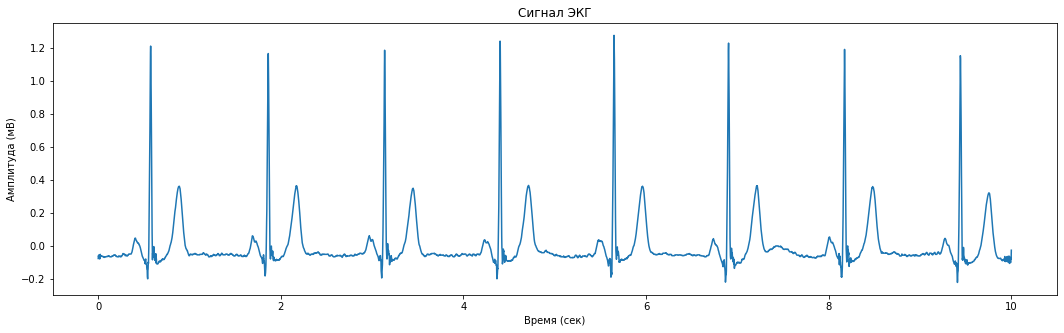

In [32]:
plt.figure(figsize=(18, 5))
plt.title("Сигнал ЭКГ")
plt.xlabel("Время (сек)")
plt.ylabel("Амплитуда (мВ)")
plt.plot(np.linspace(0, signal_duration, signal_size), signals[2])

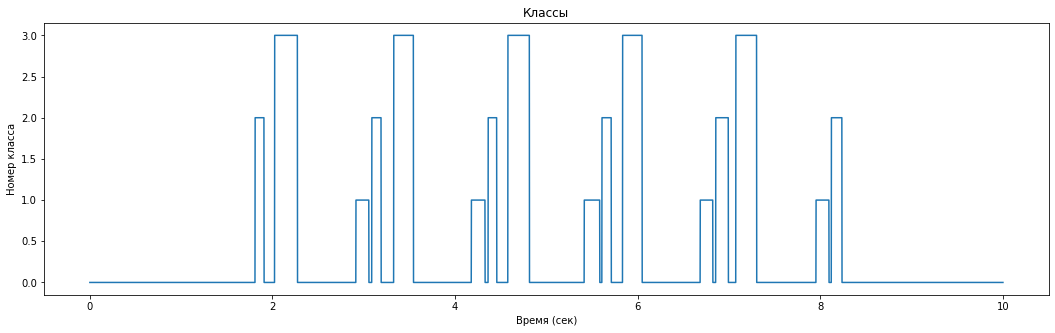

In [33]:
plt.figure(figsize=(18, 5))
plt.title("Классы")
plt.xlabel("Время (сек)")
plt.ylabel("Номер класса")
plt.plot(np.linspace(0, signal_duration, signal_size), masks[2])

In [34]:
# Вспомогательные функции, превращающие маску в сегментацию

v_to_del = {1:'p', 2:'qrs', 3:'t'}

def remove_small(signal):
    max_dist = 12
    last_zero = 0
    for i in range(len(signal)):
        if signal[i] == 0:
            if i - last_zero < max_dist:
                signal[last_zero:i] = 0
            last_zero = i

def merge_small(signal):
    max_dist = 12
    lasts = np.full(signal.max() + 1, -(max_dist+1))
    for i in range(len(signal)):
        m = signal[i]
        if i - lasts[m] < max_dist and m > 0:
            signal[lasts[m]:i] = m
        lasts[m] = i

def mask_to_delineation(mask):
    merge_small(mask)
    remove_small(mask)
    delineation = {'p':[], 'qrs':[], 't':[]}
    i = 0
    mask_length = len(mask)
    while i < mask_length:
        v = mask[i]
        if v > 0:
            delineation[v_to_del[v]].append([i, 0])
            while i < mask_length and mask[i] == v:
                delineation[v_to_del[v]][-1][1] = i
                i += 1
            t = delineation[v_to_del[v]][-1]
        i += 1
    return delineation

In [35]:
mask_to_delineation(masks[0])

{'p': [[1091, 1142],
  [1529, 1582],
  [1950, 2018],
  [2380, 2441],
  [2811, 2873],
  [3233, 3285],
  [3654, 3703],
  [4075, 4131]],
 'qrs': [[708, 773],
  [1163, 1216],
  [1600, 1662],
  [2034, 2084],
  [2458, 2508],
  [2890, 2942],
  [3310, 3366],
  [3722, 3775],
  [4145, 4196]],
 't': [[821, 901],
  [1256, 1361],
  [1694, 1805],
  [2138, 2229],
  [2566, 2657],
  [2981, 3079],
  [3402, 3497],
  [3823, 3929]]}

In [36]:
wave_type_to_color = {
    "p": "yellow",
    "qrs": "red",
    "t": "green"
}

def plot_signal_with_mask(signal, mask):
    plt.figure(figsize=(18, 5))
    plt.title("Сигнал с маской")
    plt.xlabel("Время (сек)")
    plt.ylabel("Амплитуда (мВ)")
    x_axis_values = np.linspace(0, len(signal) / sample_rate, len(signal))
    plt.plot(x_axis_values, signal, linewidth=2, color="black")
    
    delineation = mask_to_delineation(mask)
    for wave_type in ["p", "qrs", "t"]:
        color = wave_type_to_color[wave_type]
        for begin, end in delineation[wave_type]:
            begin /= sample_rate
            end /= sample_rate
            plt.axvspan(begin, end, facecolor=color, alpha=0.5)

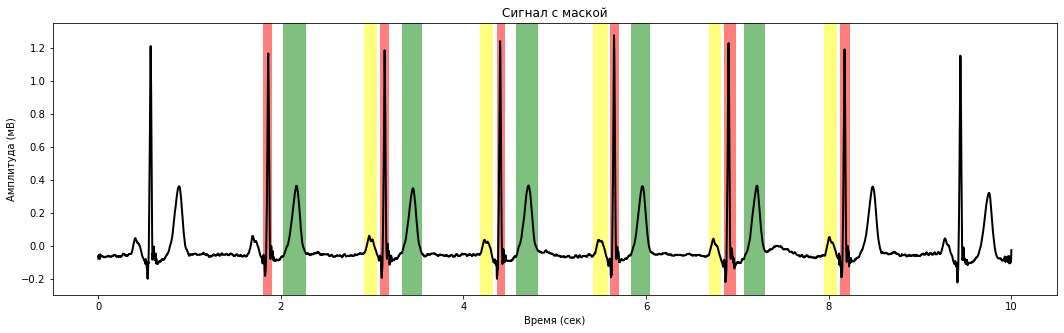

In [37]:
plot_signal_with_mask(signals[2], masks[2])

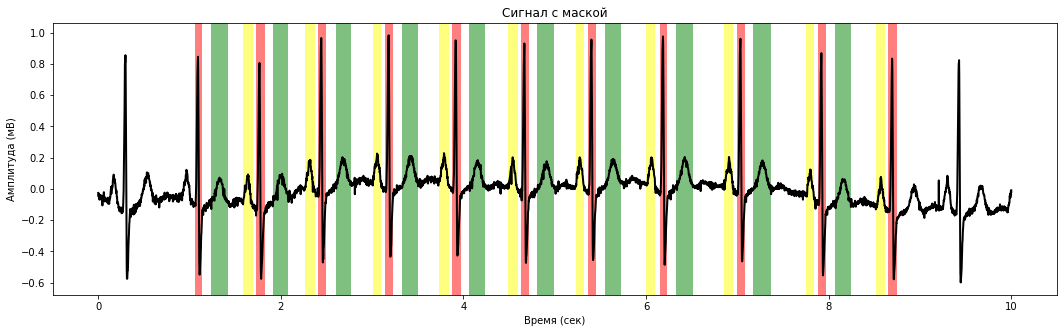

In [38]:
plot_signal_with_mask(signals[3], masks[3])

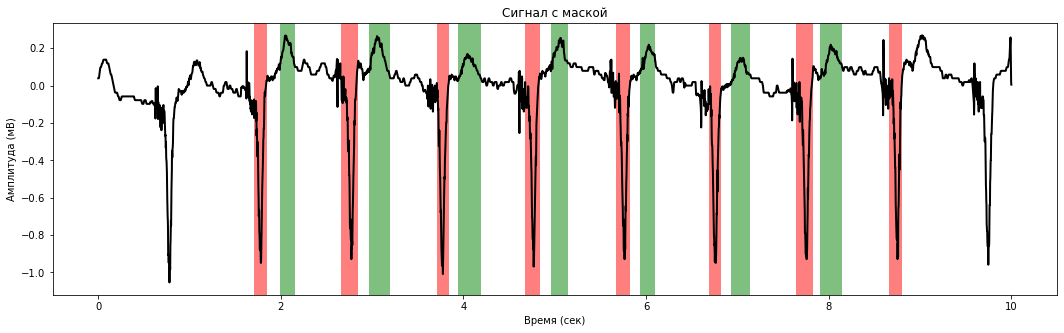

In [39]:
plot_signal_with_mask(signals[12], masks[12])

In [40]:
signals_train, signals_test, masks_train, masks_test, classes_train, classes_test = \
    train_test_split(signals, masks, classes, random_state=42)

### Объявление Dataloader

In [41]:
class SegmentationDataset(torch.utils.data.Dataset):
    def __init__(self, signals, masks):
        self._signals = torch.FloatTensor(np.expand_dims(signals, axis=1))
        self._masks = torch.LongTensor(masks)
        self._sub_len = 4000

    def __len__(self):
        return len(self._signals)

    def __getitem__(self, i):
        shift = np.random.randint(0, 1000)
        return self._signals[i, :, shift:shift+self._sub_len].clone().detach(), \
            self._masks[i, shift:shift+self._sub_len].clone().detach()

In [42]:
def get_loader(signals, masks, batch_size=4):
    dataset = SegmentationDataset(signals, masks)
    return DataLoader(dataset, batch_size=batch_size)

In [43]:
train_loader = get_loader(signals_train, masks_train)
val_loader = get_loader(signals_test, masks_test)

### Вспомогательные функции

In [44]:
import torch.nn.functional as F

def get_loss(model, X_batch, y_batch):
    logits = model(X_batch)
    logits = logits[:, :, 1000:-1000]
    y_batch = y_batch[:, 1000:-1000]
    return F.cross_entropy(logits, y_batch).mean()

In [45]:
class Drawer():
    def __init__(self):
        self._train = []
        self._val = []
    
    def add(self, train_loss, val_iou):
        self._train.append(train_loss)
        self._val.append(val_iou)
        
    def plot(self):
        epochs = range(1, 1 + len(self._train))
        plt.figure(figsize=(10, 8))
        plt.title('train/val loss')
        plt.xlabel('Эпоха')
        plt.ylabel('Loss')
        plt.plot(epochs, self._train)
        plt.plot(epochs, self._val)
        plt.legend(["train", "val"])
        plt.show()

In [46]:
import time

def fit(model, train_loader, val_loader, optimizer, loss_function, num_epochs=None):
    train_losses = []
    val_losses = []
    drawer = Drawer()
    min_loss = 1e6
    min_loss_index = 0
    epoch = 0
    
    while num_epochs is None or epoch < num_epochs:
        start_time = time.time()
        model.train()
        for X_batch, y_batch in train_loader:
            loss = loss_function(model, X_batch, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_losses.append(loss.data.numpy())

        model.eval()
        for X_batch, y_batch in val_loader:
            loss = get_loss(model, X_batch, y_batch)
            val_losses.append(loss.data.numpy())
            
        train_loss = np.mean(train_losses[-len(train_loader):])
        val_loss = np.mean(val_losses[-len(val_loader):])
        print(len(train_loader), len(val_loader))
        drawer.add(train_loss, val_loss)
        
        clear_output(True)
        drawer.plot()
        print("Epoch {} took {:.3f}s".format(epoch + 1, time.time() - start_time))
        print("training loss: \t{:.6f}".format(train_loss))
        print("validation loss: \t{:.6f}".format(val_loss))
        
        if val_loss < min_loss - 1e-5:
            min_loss = val_loss
            min_loss_index = epoch
        elif epoch - min_loss_index >= 10:
            break
        
        epoch += 1

### Объявление модели

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/nn_like_unet.png)
[ https://arxiv.org/pdf/2001.04689.pdf ]

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/cnn.jpeg)
[ https://cs231n.github.io/convolutional-networks/ ]

In [47]:
# Один блок свёртки
class UNetConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetConv, self).__init__()
        self._model = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=9, padding=4),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(),
            nn.Conv1d(out_channels, out_channels, kernel_size=9, padding=4),
            nn.BatchNorm1d(out_channels),
            nn.ReLU()
        )
    
    def forward(self, X):
        return self._model(X)
    

class UNetDown(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNetDown, self).__init__()
        self._model = nn.Sequential(
            nn.MaxPool1d(2),
            UNetConv(in_channels, out_channels)
        )
    
    def forward(self, X):
        return self._model(X)
    

class UNetUp(nn.Module):
    def __init__(self, in_channels, in_channels_skip, out_channels):
        super(UNetUp, self).__init__()
        self._up = nn.ConvTranspose1d(in_channels, in_channels, kernel_size=8, stride=2, padding=3)
        self._model = UNetConv(in_channels + in_channels_skip, out_channels)
    
    def forward(self, X_skip, X):
        X = self._up(X)  
        diff = X_skip.size()[2] - X.size()[2]
        X = F.pad(X, (diff // 2, diff - diff // 2))  
        return self._model(torch.cat([X_skip, X], dim=1))

In [48]:
class UNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(UNet, self).__init__()
        n = 4
        self._input = UNetConv(in_channels, n)
        self._down1 = UNetDown(n, 2*n)
        self._down2 = UNetDown(2*n, 4*n)
        self._down3 = UNetDown(4*n, 8*n)
        self._down4 = UNetDown(8*n, 16*n)
        self._up1 = UNetUp(16*n, 8*n, 8*n)
        self._up2 = UNetUp(8*n, 4*n, 4*n)
        self._up3 = UNetUp(4*n, 2*n, 2*n)
        self._up4 = UNetUp(2*n, n, n)
        self._output = nn.Conv1d(n, num_classes, kernel_size=1)
        
    def forward(self, X):
        x1 = self._input(X)
        x2 = self._down1(x1)
        x3 = self._down2(x2)
        x4 = self._down3(x3)
        x = self._down4(x4)
        x = self._up1(x4, x)
        x = self._up2(x3, x)
        x = self._up3(x2, x)
        x = self._up4(x1, x)
        return self._output(x)

### Обучение

In [49]:
model = UNet(1, 4)
optimizer = torch.optim.Adam(model.parameters())

In [50]:
print(model)

UNet(
  (_input): UNetConv(
    (_model): Sequential(
      (0): Conv1d(1, 4, kernel_size=(9,), stride=(1,), padding=(4,))
      (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv1d(4, 4, kernel_size=(9,), stride=(1,), padding=(4,))
      (4): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (_down1): UNetDown(
    (_model): Sequential(
      (0): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): UNetConv(
        (_model): Sequential(
          (0): Conv1d(4, 8, kernel_size=(9,), stride=(1,), padding=(4,))
          (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Conv1d(8, 8, kernel_size=(9,), stride=(1,), padding=(4,))
          (4): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU()
        )
      )
 

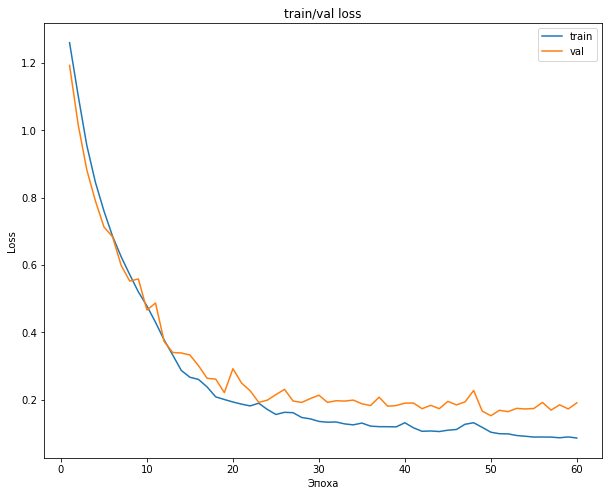

Epoch 60 took 8.334s
training loss: 	0.086291
validation loss: 		0.190832


In [51]:
fit(model, train_loader, val_loader, optimizer, get_loss)

In [52]:
segmentation_model = model

### Проверяем модель

In [53]:
model = model.eval()

In [54]:
# получение маски по сигналу
def get_mask(signal):
    signal = np.expand_dims(signal, axis=(0, 1))
    signal = torch.FloatTensor(signal)
    mask = model(signal)[0]
    mask = mask.max(axis=0)[1]
    mask[:500] = 0
    mask[-500:] = 0
    return mask.data.numpy()

In [55]:
def plot_test_sample(index):
    signal = signals_test[index]
    true_mask = masks_test[index]

    mask = get_mask(signal)
    plot_signal_with_mask(signal, mask)
    plot_signal_with_mask(signal, true_mask)

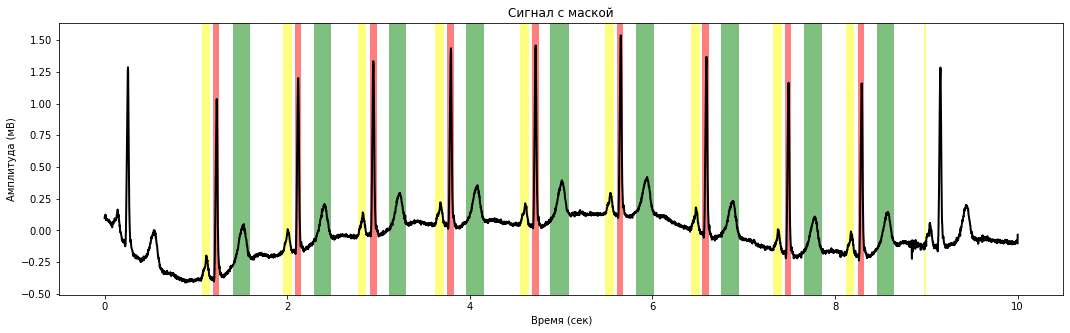

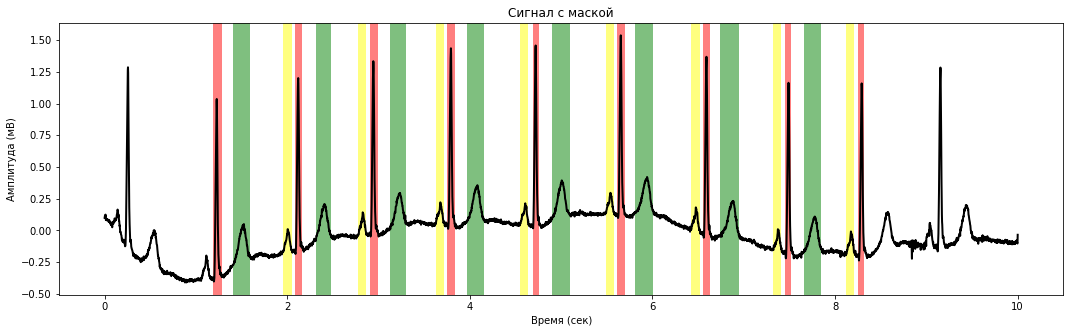

In [56]:
plot_test_sample(3)

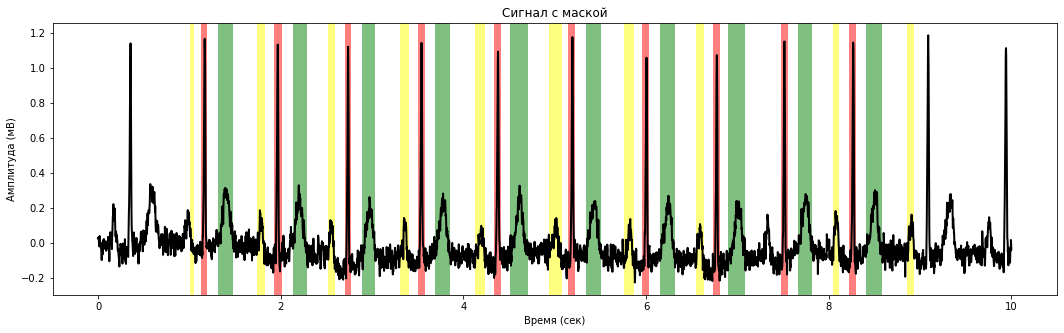

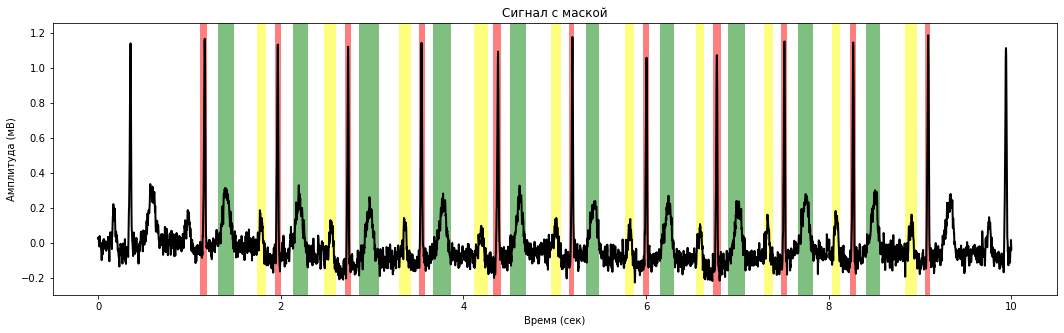

In [57]:
plot_test_sample(15)

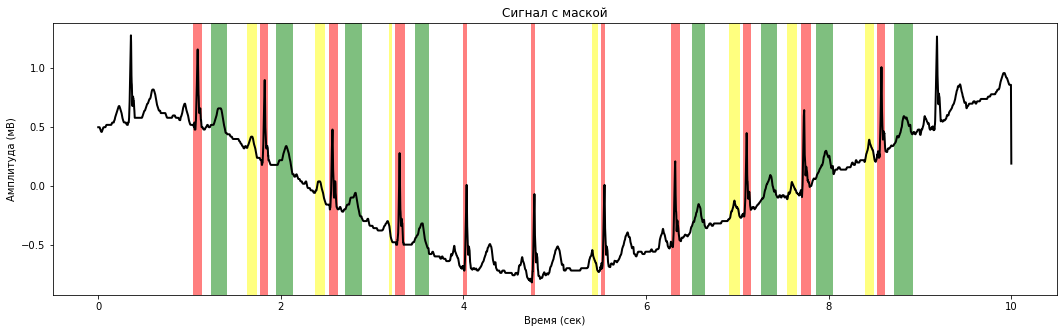

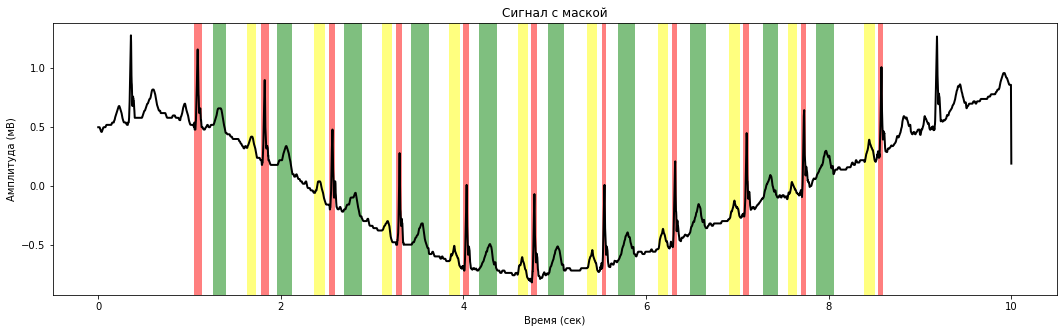

In [58]:
plot_test_sample(20)

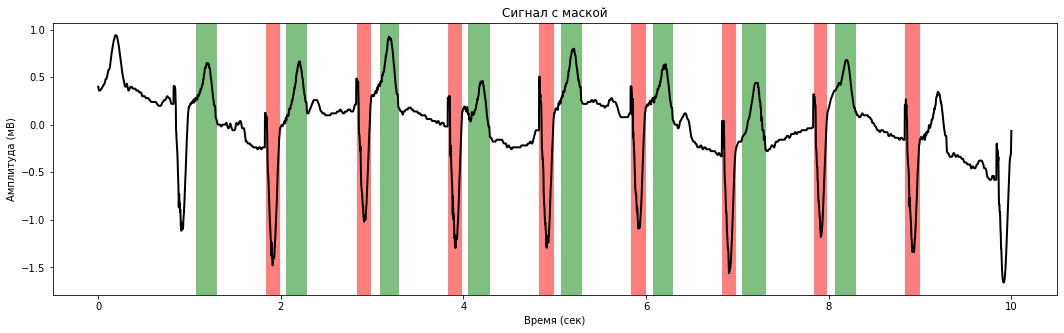

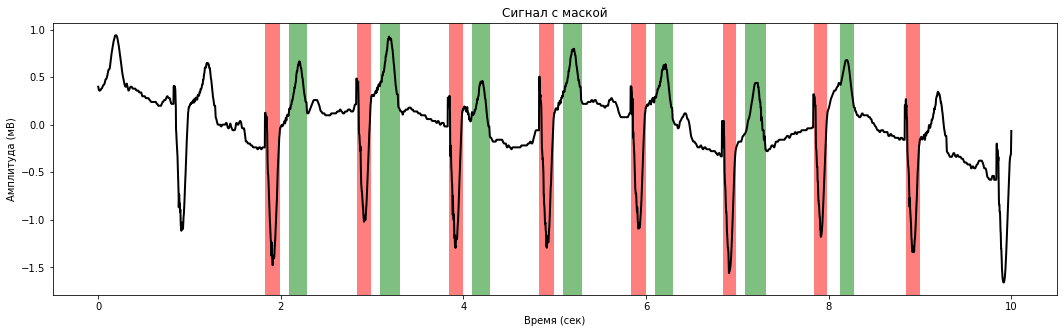

In [59]:
plot_test_sample(25)

### Рецептивное поле (receptive field)

![img](https://raw.githubusercontent.com/MoskalenkoViktor/dl_ecg/master/receptive_field.png)
[ https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807 ]

In [60]:
print(f"Число параметров модели: {sum(p.numel() for p in model.parameters())}")

Число параметров модели: 167344


In [61]:
# КОД: узнать рецептивное поле

## Сохранение моделей

In [ ]:
arrhythmia_model.eval()
torch.onnx.export(arrhythmia_model, torch.randn(1, 279), "arrhythmia_model.onnx")

In [ ]:
if COLAB:
    from google.colab import files
    files.download("arrhythmia_model.onnx")

## Диагноз по сигналу

In [62]:
# КОД
model = None
train_loader = None
val_loader = None
optimizer = None
loss_diagnosis = None

In [63]:
#fit(model, train_loader, val_loader, optimizer, loss_diagnosis)

## Диагноз по сигналу + сегментации

In [64]:
# КОД
model = None
train_loader = None
val_loader = None
optimizer = None
loss_diagnosis = None

In [65]:
#fit(model, train_loader, val_loader, optimizer, loss_diagnosis)